# Import of Library

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Data Visualization and cleaning

In [3]:
df= pd.read_csv("D:\Code\others\my_learnings\ml\Dataset\placement.csv")

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Rohit\AppData\Local\Temp\ipykernel_2480\4153666057.py:1: SyntaxWarning: invalid escape sequence '\C'
  df= pd.read_csv("D:\Code\others\my_learnings\ml\Dataset\placement.csv")


In [4]:
df.head(5)


,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [5]:
df.shape

(100, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [7]:
df.describe()

,Unnamed: 0,cgpa,iq,placement
count,100.000000,100.000000,100.000000,100.000000
mean,49.500000,5.991000,123.580000,0.500000
std,29.011492,1.143634,39.944198,0.502519
min,0.000000,3.300000,37.000000,0.000000
25%,24.750000,5.075000,101.500000,0.000000
50%,49.500000,6.000000,127.500000,0.500000
75%,74.250000,6.900000,149.000000,1.000000
max,99.000000,8.500000,233.000000,1.000000


In [8]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head(5)

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


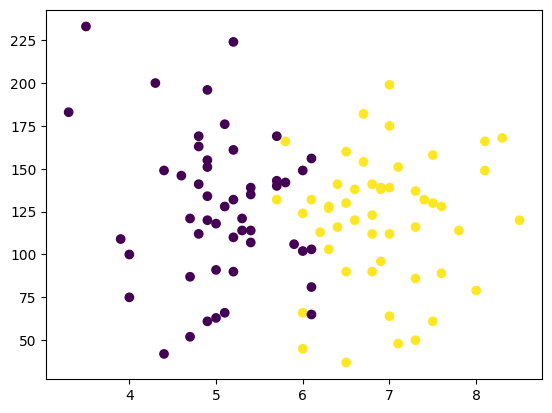

In [9]:
plt.scatter(df['cgpa'], df['iq'], c=df['placement'])

In [10]:
X=df.iloc[:,:1]
y=df.iloc[:,2:]

In [13]:
X.shape, y.shape

((100, 1), (100, 1))

# Model Train Test Split

In [21]:
X_train, X_test, y_train, y_test =train_test_split(X, y, random_state=42, test_size=0.2)

In [22]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((80, 1), (80, 1), (20, 1), (20, 1))

## Making the vlaues sclaer

In [31]:
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)
X_train, X_train

(array([[ 1.64027754],
        [-1.44090679],
        [ 0.91529299],
        [ 1.4590314 ],
        [ 2.27463902],
        [-0.80654531],
        [-0.98779145],
        [-1.44090679],
        [-0.80654531],
        [ 1.1871622 ],
        [ 0.82466992],
        [-0.71592224],
        [-0.17218383],
        [-0.71592224],
        [ 0.73404686],
        [ 1.00591606],
        [ 0.82466992],
        [ 1.91214675],
        [ 0.73404686],
        [-0.71592224],
        [-0.5346761 ],
        [-1.07841452],
        [-0.89716838],
        [-1.53152986],
        [ 0.00906231],
        [-0.71592224],
        [-0.5346761 ],
        [-0.89716838],
        [ 0.00906231],
        [ 0.37155458],
        [-1.16903758],
        [ 1.27778527],
        [-2.43776054],
        [ 0.46217765],
        [ 0.09968538],
        [ 0.09968538],
        [-0.2628069 ],
        [ 0.91529299],
        [-0.2628069 ],
        [-0.98779145],
        [ 0.09968538],
        [ 0.19030844],
        [ 0.37155458],
        [ 0

## Model Train

In [32]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()


In [33]:
model.fit(X_train, y_train)

C:\Users\Rohit\anaconda3\envs\my_learning_venv\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


## Prediction on train model

In [36]:
y_pred=model.predict(X_test)
y_test, y_test

(    placement
 83          1
 53          1
 70          1
 45          1
 44          1
 39          0
 22          0
 80          0
 10          1
 0           1
 18          0
 30          1
 73          0
 33          0
 90          1
 4           0
 76          0
 77          1
 12          0
 31          0,
     placement
 83          1
 53          1
 70          1
 45          1
 44          1
 39          0
 22          0
 80          0
 10          1
 0           1
 18          0
 30          1
 73          0
 33          0
 90          1
 4           0
 76          0
 77          1
 12          0
 31          0)

## Evalutaion Matrix

In [41]:
report =classification_report(y_test, y_pred)
cm=confusion_matrix(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.91      1.00      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20



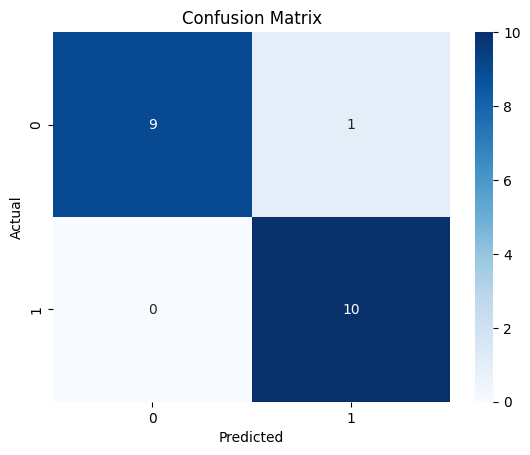

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
